# Numerical integration of differential equations : Explicit and implicit schemes

Problems in poromechanics will sometimes require to solve differential equations. Think for instance about hardening laws in plasticity, which can take such forms:

$$
\dot{p}_c = -h\mathrm{tr}(\underline{\underline{\dot{\varepsilon}}}^p)\cdot p_c.
$$

Differential equation often don't have obvious analytical solutions, and must thus be integrated numerically. To do so, we discretize the domain (in our case, time) to approximate the derivative. \
Take for instance the following Cauchy problem:

$$
\left\{
\begin{align}
\frac{\mathrm{d}f}{\mathrm{d}t}&=-f(t), \\
f(0)&=1.\\
\end{align}
\right.
$$

Let us use a discretization step $\Delta t$ and denote $f_0,\dots,f_n$ the quantities $f(t_0=0),\dots,f(t_n=n\Delta t)$ respectively. \
We then have 

$$
\left(\frac{\mathrm{d}f}{\mathrm{d}t}\right)_k \simeq \frac{f_{k+1}-f_k}{\Delta t}.
$$

Recursively, knowing $f_k$ we could express f_{k+1} through:

$$
\frac{f_{k+1}-f_k}{\Delta t} = -f_k,
$$

so that

$$
f_{k+1} = f_k + \Delta t f_k.
$$

In this way, $f_{k+1}$ is defined ***explicitly*** from $f_k$: this integration scheme is thus called ***explicit***. This particular method is called ***Forward Euler***. \
Let us implement it for the above differential equation. Its analytical solution is indeed trivial:

$$
f:t\rightarrow\exp(-t).
$$

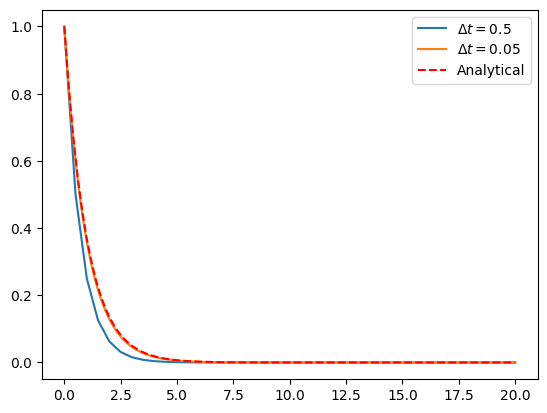

In [49]:
import matplotlib.pyplot as plt
import numpy as np

f_0 = 1
t_max = 20


def forward_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(f_k - dt * f_k)
    return T, F


# Analytical solution
T = np.linspace(0, 20, 101)
F = np.exp(-T)

plt.plot(*forward_euler(0.5), label=r"$\Delta t=0.5$")
plt.plot(*forward_euler(0.05), label=r"$\Delta t=0.05$")
plt.plot(T, F, "r--", label=r"Analytical")
plt.legend()

We can see that as our discretization step $\Delta t$ decreases, the numerical solution converges towards the analytical solution. Let us try to ***increase*** the time step and see what happens (for instance, $\Delta t =2$ and $\Delta t=2.5$):

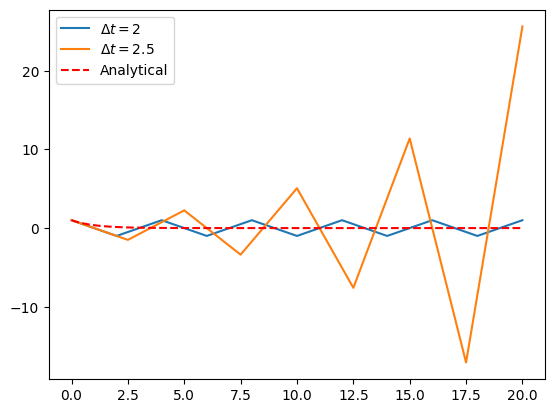

In [50]:
plt.plot(*forward_euler(2), label=r"$\Delta t=2$")
plt.plot(*forward_euler(2.5), label=r"$\Delta t=2.5$")
plt.plot(T, F, "r--", label=r"Analytical")
plt.legend()

In that case, the numerical solution no longer converges towards the analytical solution, but rather oscillates periodically for $\Delta t = 2$ and outright diverges for $\Delta t = 2.5$. The numerical method is thus instable for higher time steps. \
This particular case can be addressed analytically: at each time step, we have $f_{k+1}= f_k -\Delta t f_k = (1-\Delta t)f_k$. By trivial recursion:

$$
f_{k+1} = (1-\Delta t)f_k = (1-\Delta t)^2 f_{k-1} = \dots = (1-\Delta t)^{k+1}f_0 = (1-\Delta t)^{k+1}.
$$

It becomes apparent now that if $\Delta t=2$, $f_k = (-1)^k$ thus the oscillation, whereas if $\Delta t >2$ then $1-\Delta t >1$ so that $f_k = (1-\Delta t)^k$ is a diverging sequence. \
In general, explicit schemes require small time steps to be stable, and hence many time steps may be required to reach convergence by such algorithms. \
One alternative lies in the use of so-called ***implicit*** schemes. The simplest one is the counterpart to the forward-Euler method: the ***backwards-Euler*** method. \
Instead of using the ***known*** value $f_k$ as an estimate for $f(t)$, we can use the ***unknown*** value $f_{k+1}$. The equation to calculate $f_{k+1}$ from $f_k$ becomes:

$$
f_{k+1} = f_k - \Delta t f_{k+1},
$$

so that

$$
f_{k+1} = \frac{f_k}{1+\Delta t}.
$$

Trivial recursion yields a direct expression of $f_k$ in this case:

$$
f_k = \frac{f_{k-1}}{1+\Delta t} = \dots = \frac{f_0}{(1+\Delta t)^k} = \frac{1}{(1+\Delta t)^k},
$$

which is stable for any time step $\Delta t > 0$. \
Let us implement the backwards-Euler method on this example:

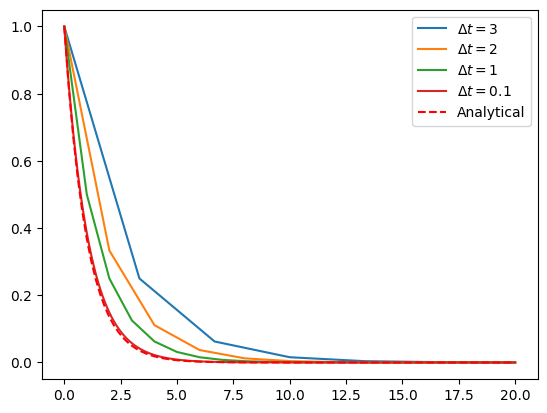

In [52]:
def backwards_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(f_k / (1 + dt))
    return T, F


# Numerical solution for dt = 3, 2, 1 and 0.1
plt.plot(*backwards_euler(3), label=r"$\Delta t=3$")
plt.plot(*backwards_euler(2), label=r"$\Delta t=2$")
plt.plot(*backwards_euler(1), label=r"$\Delta t=1$")
plt.plot(*backwards_euler(0.1), label=r"$\Delta t=0.1$")
plt.plot(T, F, "r--", label=r"Analytical")
plt.legend()

As we can see, the algorithm is very stable even for bigger time steps. In this simple example, the backwards-Euler iteration can be calculated directly as the differential equation is linear. However, in the general case, $f_{k+1}$ may not be calculated directly from $f_k$, whereas direct calculation is always possible in the forward-Euler method.\
Consider the following Cauchy problem:

$$
\left\{
\begin{align}
\frac{\mathrm{d}f}{\mathrm{d}t}&=f(t)\cos(f(t)), \\
f(0)&=1.\\
\end{align}
\right.
$$

With the forward-Euler method, the update is still direct: $f_{k+1} = f_k + \Delta t f_k\cos(f_k)$. However, the backwards-Euler method has the following update:

$$
f_{k+1} = f_k + \Delta t f_{k+1}\cos(f_{k+1}) \ \rightarrow \ f_{k+1}(1-\Delta t\cos(f_{k+1})) = f_k,
$$

which is a nonlinear equation of unknown $f_{k+1}$. Updating the backwards-Euler method thus requires solving a nonlinear equation, which is evidently way more computationally expensive than the forward-Euler update. However, we gain the stability of the backwards-Euler method. Let us compare the two.

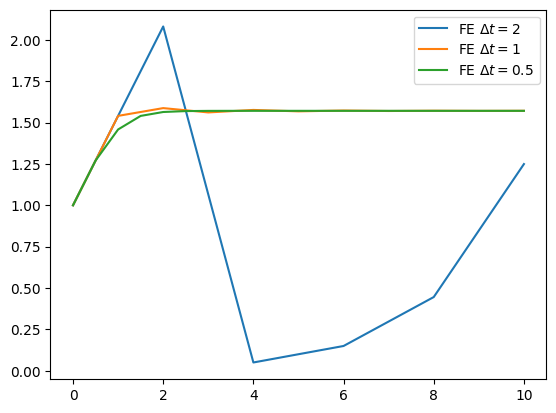

In [80]:
f_0 = 1
t_max = 10


def forward_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(f_k + dt * f_k * np.cos(f_k))
    return T, F


for dt in [2, 1, 0.5]:
    plt.plot(*forward_euler(dt), label=r"FE $\Delta t = {}$".format(dt))

plt.legend()

For the backwards-Euler scheme, we need an implementation of the Newton method to use in the update. We will reuse the implementation from the previous notebooks.

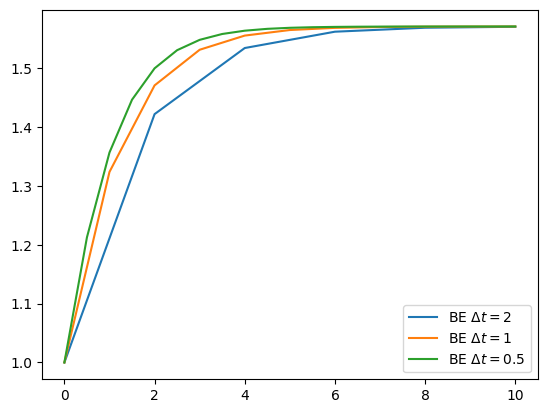

In [86]:
def newton_method(function, derivative, initial_guess, tolerance, max_iteration=40):
    x_n = initial_guess
    iteration = 0
    while abs(function(x_n)) > tolerance and iteration < max_iteration:
        x_n -= function(x_n) / derivative(x_n)
        iteration += 1
    if abs(function(x_n)) > tolerance:  # Not converged
        print("Did not converge after {} iterations.".format(iteration))
    return x_n


def g(f, f_k, dt):
    return f * (1 - dt * np.cos(f)) - f_k


def g_prime(f, dt):
    return 1 - dt * np.cos(f) + f * np.sin(f)


def backwards_euler(dt):
    F = [f_0]
    T = np.linspace(0, t_max, int(1 + t_max / dt))
    for t in T[1:]:
        f_k = F[-1]
        F.append(
            newton_method(lambda f: g(f, f_k, dt), lambda f: g_prime(f, dt), f_k, 1e-6)
        )
    return T, F


for dt in [2, 1, 0.5]:
    plt.plot(*backwards_euler(dt), label=r"BE $\Delta t = {}$".format(dt))

plt.legend()